## **Installing Biopython**

In [4]:
!pip install biopython

     ---------------------------------------- 2.7/2.7 MB 3.9 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
from Bio.Seq import Seq

seq_obj = Seq('ATGCCCGCATTAAATTGC')
print(type(seq_obj))
print(seq_obj.complement())
print(seq_obj.reverse_complement())

<class 'Bio.Seq.Seq'>
TACGGGCGTAATTTAACG
GCAATTTAATGCGGGCAT


In [ ]:
rna_seq_obj = seq_obj.transcribe()
print(rna_seq_obj)
print(rna_seq_obj.back_transcribe())

AUGCCCGCAUUAAAUUGC
ATGCCCGCATTAAATTGC


In [ ]:
print(seq_obj.translate())
print(rna_seq_obj.translate())

MPALNC
MPALNC


In [ ]:
print(seq_obj.count('A'),seq_obj.count('T'),seq_obj.count('G'),seq_obj.count('C'))

5 5 3 5


In [ ]:
# GC Content
((seq_obj.count('G')+seq_obj.count('C'))/len(seq_obj))*100

44.44444444444444

In [ ]:
from Bio.SeqUtils import GC
GC(seq_obj)

44.44444444444444

In [ ]:
from Bio.SeqUtils import gc_fraction
gc_fraction(seq_obj)

In [3]:
from Bio.SeqUtils import molecular_weight as mc
mc(seq_obj)

5538.540499999999

In [ ]:
sequence = Seq('AAAA')
sequence.count('AA')

2

In [ ]:
sequence.count_overlap('AA')

3

# Accessing NCBI databases with Biopython
We will look at how to access such databases at the National Center for Biotechnology Information (NCBI). We will not only discuss GenBank, but also other databases at NCBI. Many people refer (wrongly) to the whole set of NCBI databases as GenBank, but NCBI includes the nucleotide database and many others, for example, PubMed.

## GenBank
GenBank® is a comprehensive database that contains publicly available nucleotide sequences for more than 300,000 organisms named at the genus level or lower, obtained primarily through submissions from individual laboratories and batch submissions from large-scale sequencing projects, including whole genome shotgun (WGS) and environmental sampling projects. Most submissions are made using the web-based BankIt or standalone Sequin programs, and accession numbers are assigned by GenBank staff upon receipt. Daily data exchange with the European Molecular Biology Laboratory Nucleotide Sequence Database in Europe and the DNA Data Bank of Japan ensures worldwide coverage. GenBank is accessible through the NCBI Entrez retrieval system, which integrates data from the major DNA and protein sequence databases along with taxonomy, genome, mapping, protein structure and domain information, and the biomedical journal literature via PubMed.

## Check available databases at NCBI
Biopython provides an interface to **Entrez**, the data retrieval system made available by NCBI. **Entrez** can also be used through web browser: https://www.ncbi.nlm.nih.gov/search/

*Entrez covers over 20 databases including the complete protein sequence data from PIR-International, PRF, Swiss-Prot, and PDB and nucleotide sequence data from GenBank that includes information from EMBL and DDBJ.*


**TIPS:**
- specify an email address with your query
- avoid large number of requests (100 or more) during peak times (between 9.00 a.m. and 5.00 p.m. American Eastern Time on weekdays)
- do not post more than three queries per second (Biopython will take care of this for you)
- Be sensible with your usage levels; if you want to download whole mammalian genomes, use NCBI's FTP (http://www.ncbi.nlm.nih.gov/Ftp/).
    
Following these rules will help you to avoid risk of getting blocked if you over use NCBI's servers (a good reason to give a real email address, because NCBI may try to contact you).

In [1]:
from Bio import Entrez, SeqIO

In [2]:
Entrez.email = "eamin-cse@sust.edu" 

In [5]:
# This gives you the list of available databases
handle = Entrez.einfo()
result = Entrez.read(handle)
handle.close()
print(result.keys())

dict_keys(['DbList'])


In [7]:
result['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [8]:
handle = Entrez.einfo(db="pubmed")
record = Entrez.read(handle)
print(record.keys())

dict_keys(['DbInfo'])


In [9]:
print(record['DbInfo'].keys())

dict_keys(['DbName', 'MenuName', 'Description', 'DbBuild', 'Count', 'LastUpdate', 'FieldList', 'LinkList'])


In [10]:
print(record['DbInfo']['Count'],record['DbInfo']['Description'],record['DbInfo']['LastUpdate'])

36185484 PubMed bibliographic record 2023/09/09 23:35


In [11]:
handle = Entrez.einfo(db="nucleotide")
record = Entrez.read(handle)
print(record['DbInfo']['Count'],record['DbInfo']['Description'],record['DbInfo']['LastUpdate'])

606742101 Core Nucleotide db 2023/09/09 00:31


In [12]:
for field in record["DbInfo"]["FieldList"]:
    print("%(Name)s, %(FullName)s, %(Description)s" % field)

ALL, All Fields, All terms from all searchable fields
UID, UID, Unique number assigned to each sequence
FILT, Filter, Limits the records
WORD, Text Word, Free text associated with record
TITL, Title, Words in definition line
KYWD, Keyword, Nonstandardized terms provided by submitter
AUTH, Author, Author(s) of publication
JOUR, Journal, Journal abbreviation of publication
VOL, Volume, Volume number of publication
ISS, Issue, Issue number of publication
PAGE, Page Number, Page number(s) of publication
ORGN, Organism, Scientific and common names of organism, and all higher levels of taxonomy
ACCN, Accession, Accession number of sequence
PACC, Primary Accession, Does not include retired secondary accessions
GENE, Gene Name, Name of gene associated with sequence
PROT, Protein Name, Name of protein associated with sequence
ECNO, EC/RN Number, EC number for enzyme or CAS registry number
PDAT, Publication Date, Date sequence added to GenBank
MDAT, Modification Date, Date of last update
SUBS, S

**EFetch:** Downloading full records from Entrez

**Parameters**

- `id`: Identifier (Accession no, GI [GenInfo Identifier] no , etc)
- `db`: Database name (eg. nucleotide, nuccore, etc)
- `rettype`: Output Format (eg. fasta, genbank (gb or gbk) etc)
- `retmode`: File Format (text,xml etc)

*The accession number is a unique identifier assigned to a record in sequence databases such as GenBank. Several NCBI databases use the format [alphabetical prefix][series of digits]. A change in the record in some databases (e.g. GenBank) is tracked by an integer extension of the accession number, an Accession.version identifier. The initial version of a sequence has the extension “.1”. When a change is made to a sequence in a GenBank record, the version extension of the Accession.version identifier is incremented. For the sequence NM_000245.3, “.3” indicates that the record has been updated twice. The accession number for the record as a whole remains unchanged, and will always retrieve the most recent version of the record; the older versions remain available under the original Accession.version identifiers.*

*A GI number (for GenInfo Identifier, sometimes written in lower case, " gi ") is a simple series of digits that are assigned consecutively to each sequence record processed by NCBI. The GI number bears no resemblance to the Version number of the sequence record. Each time a sequence record is changed, it is assigned a new GI number.*

Requesting a specific file format from Entrez using `Bio.Entrez.efetch()` requires specifying the `rettype` and/or `retmode` optional arguments. The different combinations are described for each database type on the pages linked to on NCBI efetch webpage - https://www.ncbi.nlm.nih.gov/books/NBK25499/#chapter4.EFetch





In [1]:
len('GGAAGGGGCGTGGCCTCGGTCCGGGGTGGCGGCCGTTGCCGCCACCAGGGCCTCTTCCTGCGGGCGGTGC')

70

In [13]:
# Fetch Single Sequence in Fasta Format from NCBI
handle = Entrez.efetch(db='nucleotide',id='34577062',rettype='fasta',retmode='text') # ID = GI Number
print(handle.read())

>NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA
GGAAGGGGCGTGGCCTCGGTCCGGGGTGGCGGCCGTTGCCGCCACCAGGGCCTCTTCCTGCGGGCGGTGC
TGCCGAGGCCGGCCTGCGCGGGGCAGTCATGGTACCCCCTTGAGCGGGCTGTGGCGGAGAGCGGGGCGGG
GACTGGCTGGAGGGTGGCGGCCCGGCGGGGCGGGGGCGGGGCCGGCCTCTGGCTCCTTCTTCCTCTGCAT
GTGGCTGGCGGCCGCAGAGCAGTTCAGTTCGCTCACTCCTCGCCGGCCGCCTCTCCTTCGGGCTCTCCTC
GCGTCACTGGAGCCATGGCGTTCGCCGAGACCTACCCGGCGGCATCCTCCCTGCCCAACGGCGATTGCGG
CCGCCCCAGGGCGCGGCCCGGAGGAAACCGGGTGACGGTGGTGCTCGGTGCGCAGTGGGGCGACGAAGGC
AAAGGGAAGGTGGTGGACCTGCTGGCGCAGGACGCCGACATCGTGTGCCGCTGCCAGGGAGGAAATAATG
CTGGCCATACAGTTGTTGTGGATTCTGTGGAATATGATTTTCATCTCTTACCCAGTGGAATAATTAATCC
AAATGTCACTGCATTCATTGGAAATGGTGTGGTAATTCATCTACCTGGATTGTTTGAAGAAGCAGAGAAA
AATGTTCAAAAAGGAAAAGGACTAGAAGGCTGGGAAAAAAGGCTTATTATATCTGACAGAGCTCATATTG
TATTTGATTTTCATCAAGCAGCTGATGGTATCCAGGAACAACAGAGACAAGAACAAGCAGGAAAAAATTT
GGGTACAACAAAAAAGGGCATTGGCCCAGTTTATTCGTCCAAAGCTGCTCGGAGTGGACTCAGGATGTGC
GACCTTGTTTCTGACTTTGATGGCTTCTCTGAGAGGTTTAAAGTTCTAGCTAACCAATACAAATCTATAT
ACCCCACTTTGG

In [6]:
# Fetch Single Sequence in Fasta Format from NCBI using Accession Number
handle = Entrez.efetch(db='nucleotide',id='NM_001126.2',rettype='fasta',retmode='text') # ID = GI Number
record = SeqIO.read(handle,'fasta')
print(f'''Sequence ID:{record.id}, Sequene Name:{record.name}, Sequence Length:{len(record)},
 Sequence Description:{record.description}''')

Sequence ID:NM_001126.2, Sequene Name:NM_001126.2, Sequence Length:2775,
 Sequence Description:NM_001126.2 Homo sapiens adenylosuccinate synthase (ADSS), mRNA


In [15]:
# Write/Save Sequence to Local File
SeqIO.write(record,'TestSeq1.fasta','fasta')

1

In [16]:
# Read Sequence in Fasta Format from Local File
record_file = SeqIO.read("TestSeq1.fasta","fasta")
print(type(record_file))
print(f'Sequence ID:{record_file.id}, Sequene Name:{record_file.name}')

<class 'Bio.SeqRecord.SeqRecord'>
Sequence ID:NM_001126.2, Sequene Name:NM_001126.2


In [17]:
# Download and Save 
with Entrez.efetch(db="nucleotide",id="874509867",rettype="fasta", retmode="text") as net_handle:
    with open("TestSeq2.fasta", "w") as out_handle:
        out_handle.write(net_handle.read())
    print("Saved")

Saved


In [18]:
record = SeqIO.read("TestSeq2.fasta", "fasta")
print(record)

ID: KP644081.1
Name: KP644081.1
Description: KP644081.1 Cypripedium calceolus voucher SNP_13_0359 ribulose-1,5-bisphosphate carboxylase/oxygenase large subunit (rbcL) gene, partial cds; chloroplast
Number of features: 0
Seq('AAGCGTCGGATTTAAAGCTGGTGTTAAAGATTACAAATTGACTTATTATACTCC...CTA')


In [19]:
# Fetch Multiple Sequence in Fasta Format from NCBI
handle = Entrez.efetch(db='nucleotide',id='34577062,186972394',rettype='fasta')
records = SeqIO.parse(handle,'fasta')
for record in records:
    print(record.id,len(record))

NM_001126.2 2775
EU490707.1 1302


In [20]:
# Fetch Multiple Sequence in Fasta Format from NCBI and Read as List
handle = Entrez.efetch(db='nucleotide',id=['34577062','186972394'],rettype='fasta',retmode='text')
records = list(SeqIO.parse(handle, "fasta"))
print(len(records))
print(records[0].id,len(records[0]))  # first record
print(records[-1].id,len(records[-1]))  # last record

2
NM_001126.2 2775
EU490707.1 1302


In [ ]:
# Write Multiple Sequence in Fasta Format to Local File
handle = Entrez.efetch(db='nucleotide',id='34577062,186972394',rettype='fasta')
records = SeqIO.parse(handle,'fasta')
SeqIO.write(records,'MultiSeq.fasta','fasta')

2

In [44]:
# Read Fasta file with multiple sequences
records = SeqIO.parse('MultiSeq.fasta','fasta')
for record in records:
    print(record.id,len(record))

NM_001126.2 2775
EU490707.1 1302


In [21]:
# Fetch Single Sequence in GenBank (gb) Format from NCBI
handle = Entrez.efetch(db='nucleotide',id='NM_001126.2', rettype='gb',retmode='text')
record = SeqIO.read(handle,'gb')
print(record.id,record.name,len(record))

NM_001126.2 NM_001126 2775


In [26]:
# Extra Properties in GenBank (gb) Format
print(record.annotations)
print(record.features)

{'molecule_type': 'mRNA', 'topology': 'linear', 'data_file_division': 'PRI', 'date': '10-OCT-2010', 'accessions': ['NM_001126'], 'sequence_version': 2, 'keywords': ['RefSeq'], 'source': 'Homo sapiens (human)', 'organism': 'Homo sapiens', 'taxonomy': ['Eukaryota', 'Metazoa', 'Chordata', 'Craniata', 'Vertebrata', 'Euteleostomi', 'Mammalia', 'Eutheria', 'Euarchontoglires', 'Primates', 'Haplorrhini', 'Catarrhini', 'Hominidae', 'Homo'], 'references': [Reference(title='Effect of a new non-cleavable substrate analog on wild-type and serine mutants in the signature sequence of adenylosuccinate lyase of Bacillus subtilis and Homo sapiens', ...), Reference(title='Association analyses of the interaction between the ADSS and ATM genes with schizophrenia in a Chinese population', ...), Reference(title='An association study of ADSS gene polymorphisms with schizophrenia', ...), Reference(title='Molecular cloning and characterization of a novel muscle adenylosuccinate synthetase, AdSSL1, from human bo

In [ ]:
# Write/Save Sequence to Local File
SeqIO.write(record,'TestSeq2.gb','gb')

1

In [ ]:
count_nt = {'A':record.seq.count('A'),'T':record.seq.count('T'),'G':record.seq.count('G'),'C':record.seq.count('C'),}
count_nt

{'A': 784, 'T': 842, 'G': 650, 'C': 499}

Text(0.5, 1.0, 'Nucleotide Frequency')

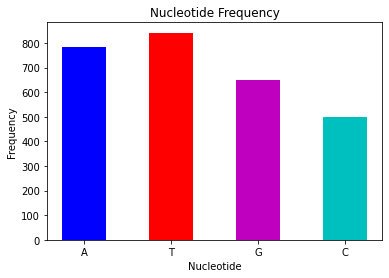

In [ ]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nt.keys(), count_nt.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')

### **ESearch:** Searching the Entrez databases

** Parameters **

The `Bio.Entrez.esearch()` function will search any of the NCBI databases. This function takes the following arguments:

`db` : The database to search. For example, this field can be nucleotide for GenBank or pubmed for PubMed.

`term`: The search term for the "Query" field. You can use search tags here.

`retmax`: Total number of records from the input set to be retrieved, up to a maximum of 10,000

We will now demonstrate a quick search for the rbcL gene in corn (Zea mays):

Note that the standard search will limit the number of record references to **20**, so if we have more, we can override **retmax** to desired amount of records.

In [27]:
handle = Entrez.esearch(db="nucleotide", term='"Zea mays"[Organism] AND rbcL[Gene]', retmax="40")
record_list = Entrez.read(handle)
handle.close()

In [28]:
record_list.keys()

dict_keys(['Count', 'RetMax', 'RetStart', 'IdList', 'TranslationSet', 'TranslationStack', 'QueryTranslation'])

In [29]:
record_list['Count']

'39'

In [30]:
len(record_list['IdList'])

39

In [31]:
record_list['IdList']

['2556365531', '2556365443', '2556365355', '2556365267', '2556365179', '2556365091', '2556365003', '2556364915', '2556364827', '2556364285', '2556364197', '2556364109', '2556364021', '2556363933', '11994090', '2449921184', '2449921097', '2323445212', '2321991244', '2321991156', '1852010630', '2125804305', '1834136082', '1767851550', '1575793430', '1331044395', '1331044107', '168598', '961526098', '893641154', '893641069', '893640984', '893640899', '540067367', '540067282', '30959082', '11990232', '12445', '18035']

In [ ]:
handle = Entrez.esearch(db="nucleotide", term='"Zea mays"[Organism] AND rbcL[Gene] ', retmax="40")
record_list = Entrez.read(handle)
handle.close()

# COVID-19 Genome Analysis using Biopython
### Fetch COVID-19 Genome from NCBI

**MN908947** (id = MN908947.3) - covid-19 genome used here was sequenced from a sample of bronchoalveolar lavage fluid from a single patient who was a worker at the market and who was admitted to the Central Hospital of Wuhan on 26 December 2019

In [32]:
from Bio import Entrez, SeqIO
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="MN908947", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [33]:
recs

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='MN908947.3', name='MN908947', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])]

In [34]:
covid_dna = recs[0].seq
covid_dna, len(covid_dna)

(Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), 29903)

In [35]:
count_nucleotides = {    'A': covid_dna.count('A'),    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),    'G': covid_dna.count('G')}
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

Text(0.5, 1.0, 'Nucleotide Frequency')

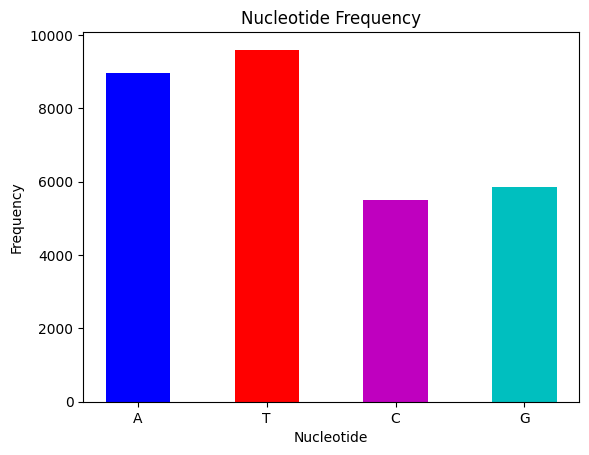

In [36]:
import matplotlib.pyplot as plt
width = 0.5
plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide')
plt.ylabel('Frequency')
plt.title('Nucleotide Frequency')